In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
dataset = pd.read_csv('financial_data.csv')

EDA

In [5]:
dataset.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [6]:
dataset.columns

Index(['entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'months_employed', 'years_employed', 'current_address_year',
       'personal_account_m', 'personal_account_y', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'e_signed'],
      dtype='object')

In [7]:
dataset.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


In [8]:
dataset.isna().any() # NA 값이 하나라도 있는 열이라면 True가 뜸

,0
entry_id,False
age,False
pay_schedule,False
home_owner,False
income,False
months_employed,False
years_employed,False
current_address_year,False
personal_account_m,False
personal_account_y,False


Histograms

In [9]:
dataset2 = dataset.drop(columns = ['entry_id', 'pay_schedule', 'e_signed'])

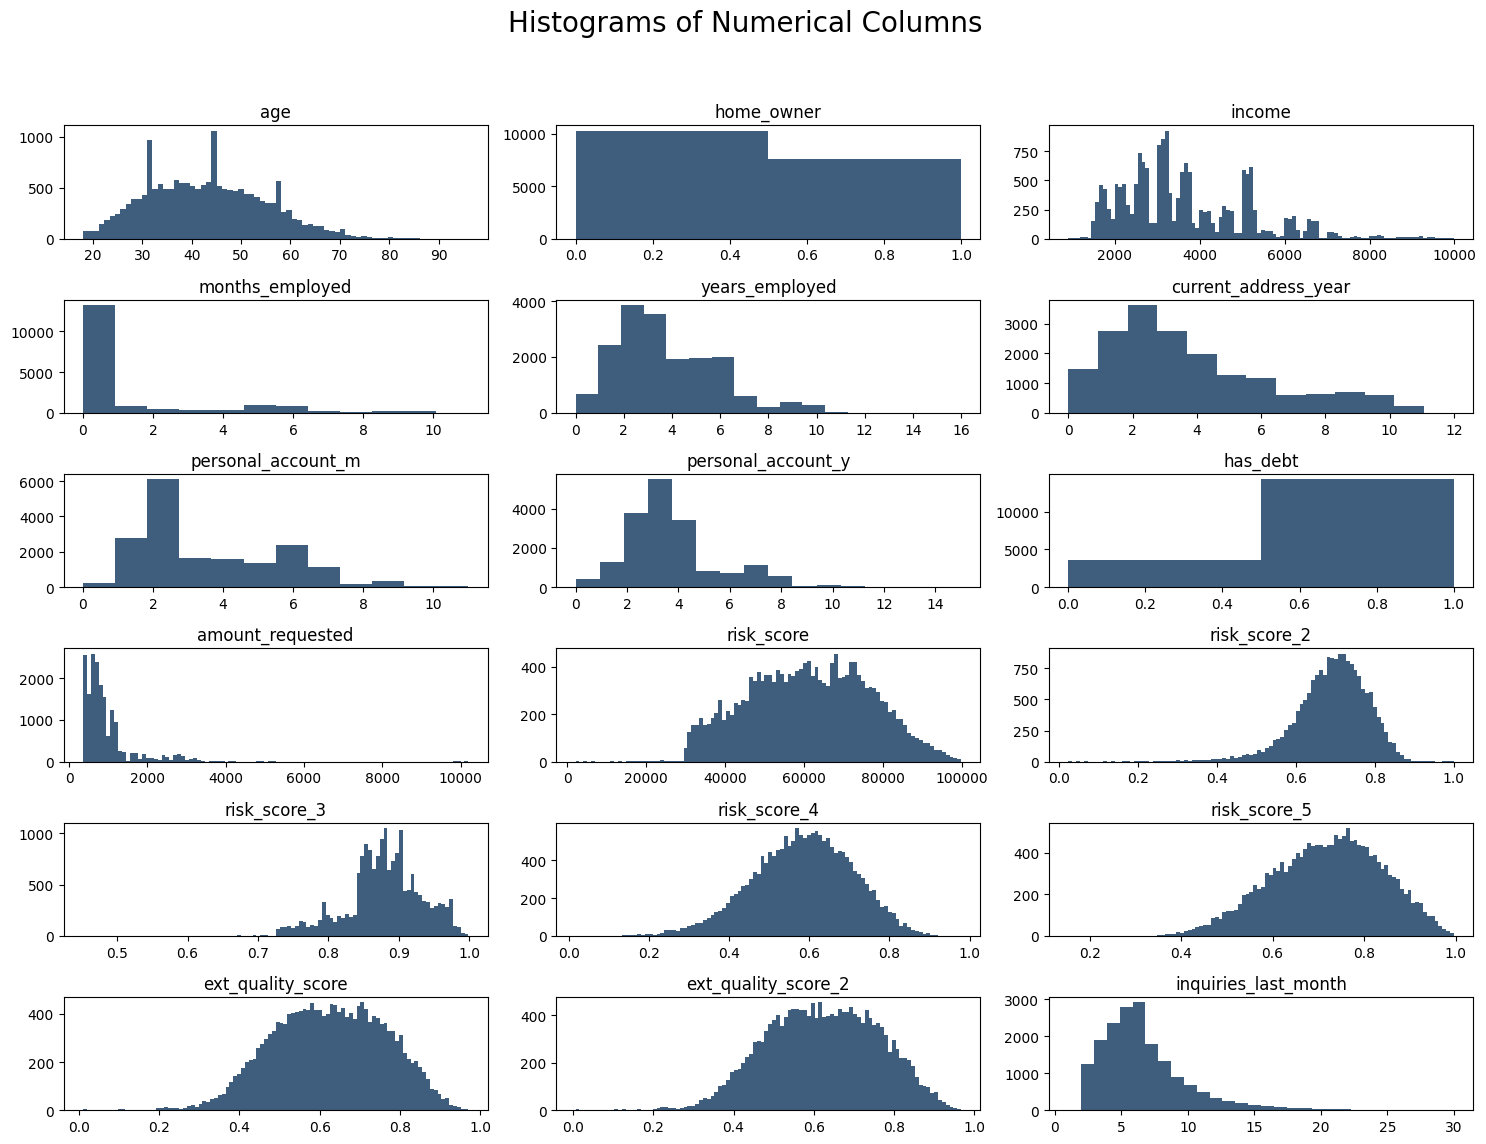

In [10]:
fig = plt.figure(figsize=(15,12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(dataset2.shape[1]):
  plt.subplot(6, 3, i+1)
  f = plt.gca()
  f.set_title(dataset2.columns.values[i])

  vals = np.size(dataset2.iloc[:, i].unique())
  if vals >= 100:
    vals = 100

  plt.hist(dataset2.iloc[:, i], bins = vals, color = '#3F5D7D')
plt.tight_layout(rect=[0,0.03,1,0.95])

Correlation Graphs

<Axes: title={'center': 'Correlation with e_signed'}>

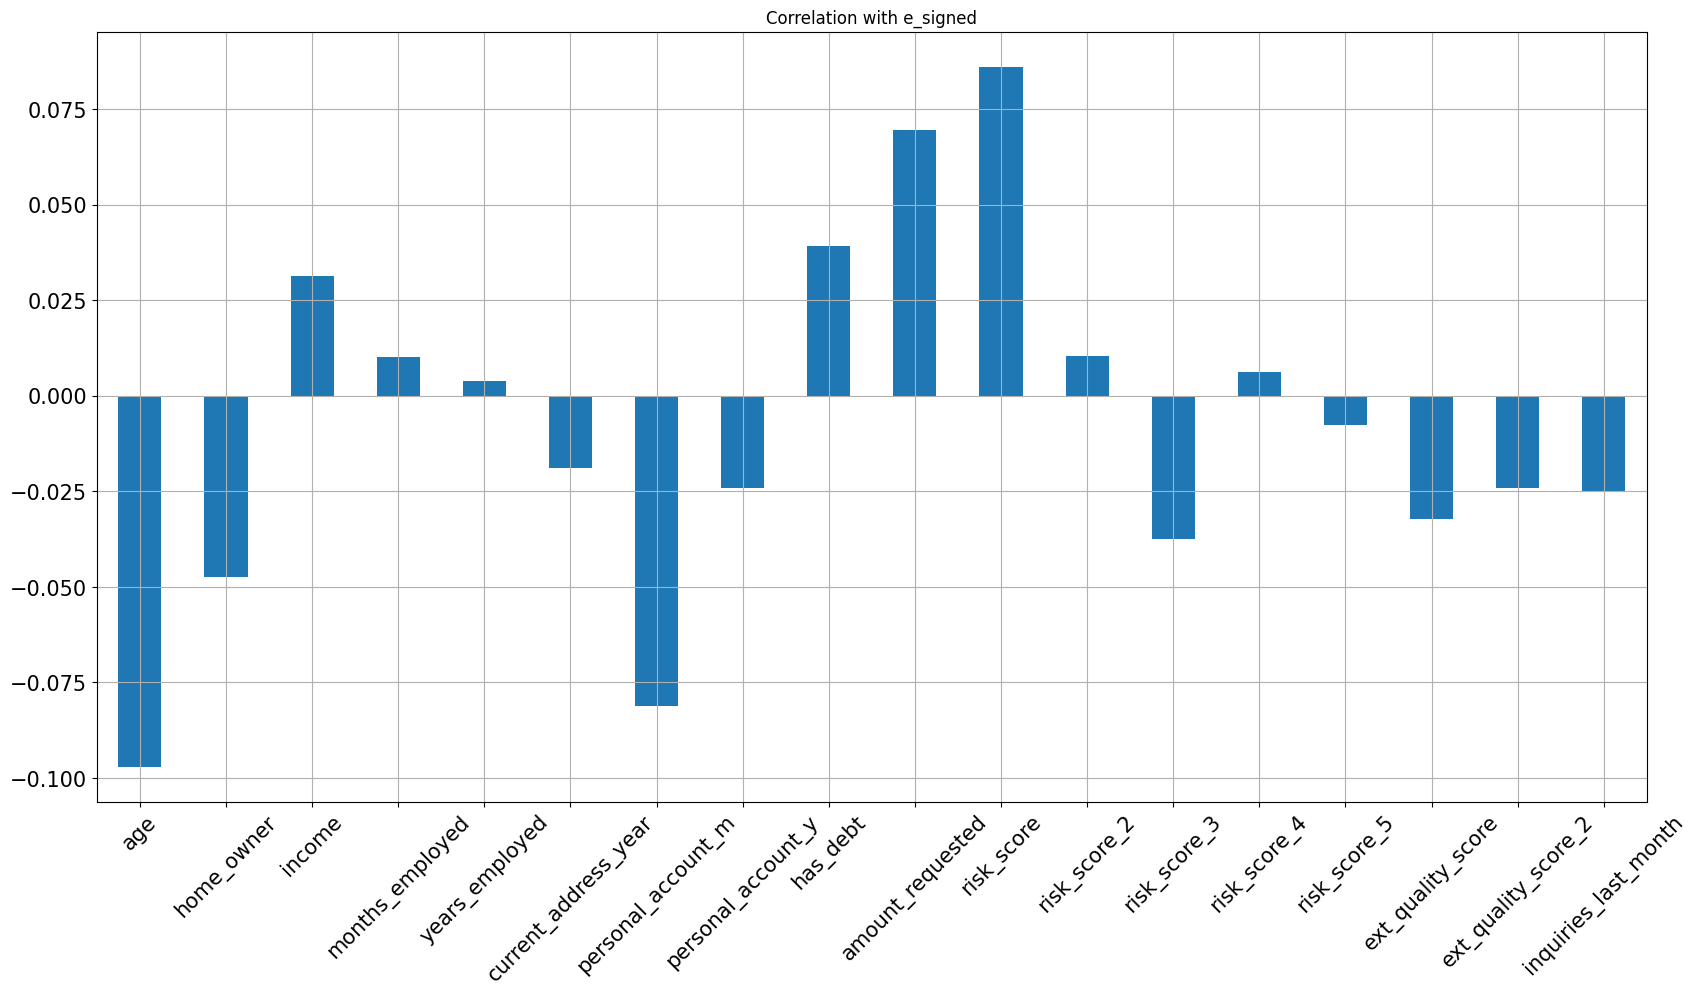

In [11]:
dataset2.corrwith(dataset.e_signed).plot.bar(
    figsize = (20,10), title = "Correlation with e_signed", fontsize = 15,
    rot = 45, grid = True
)

Correlation Matrix

<Axes: >

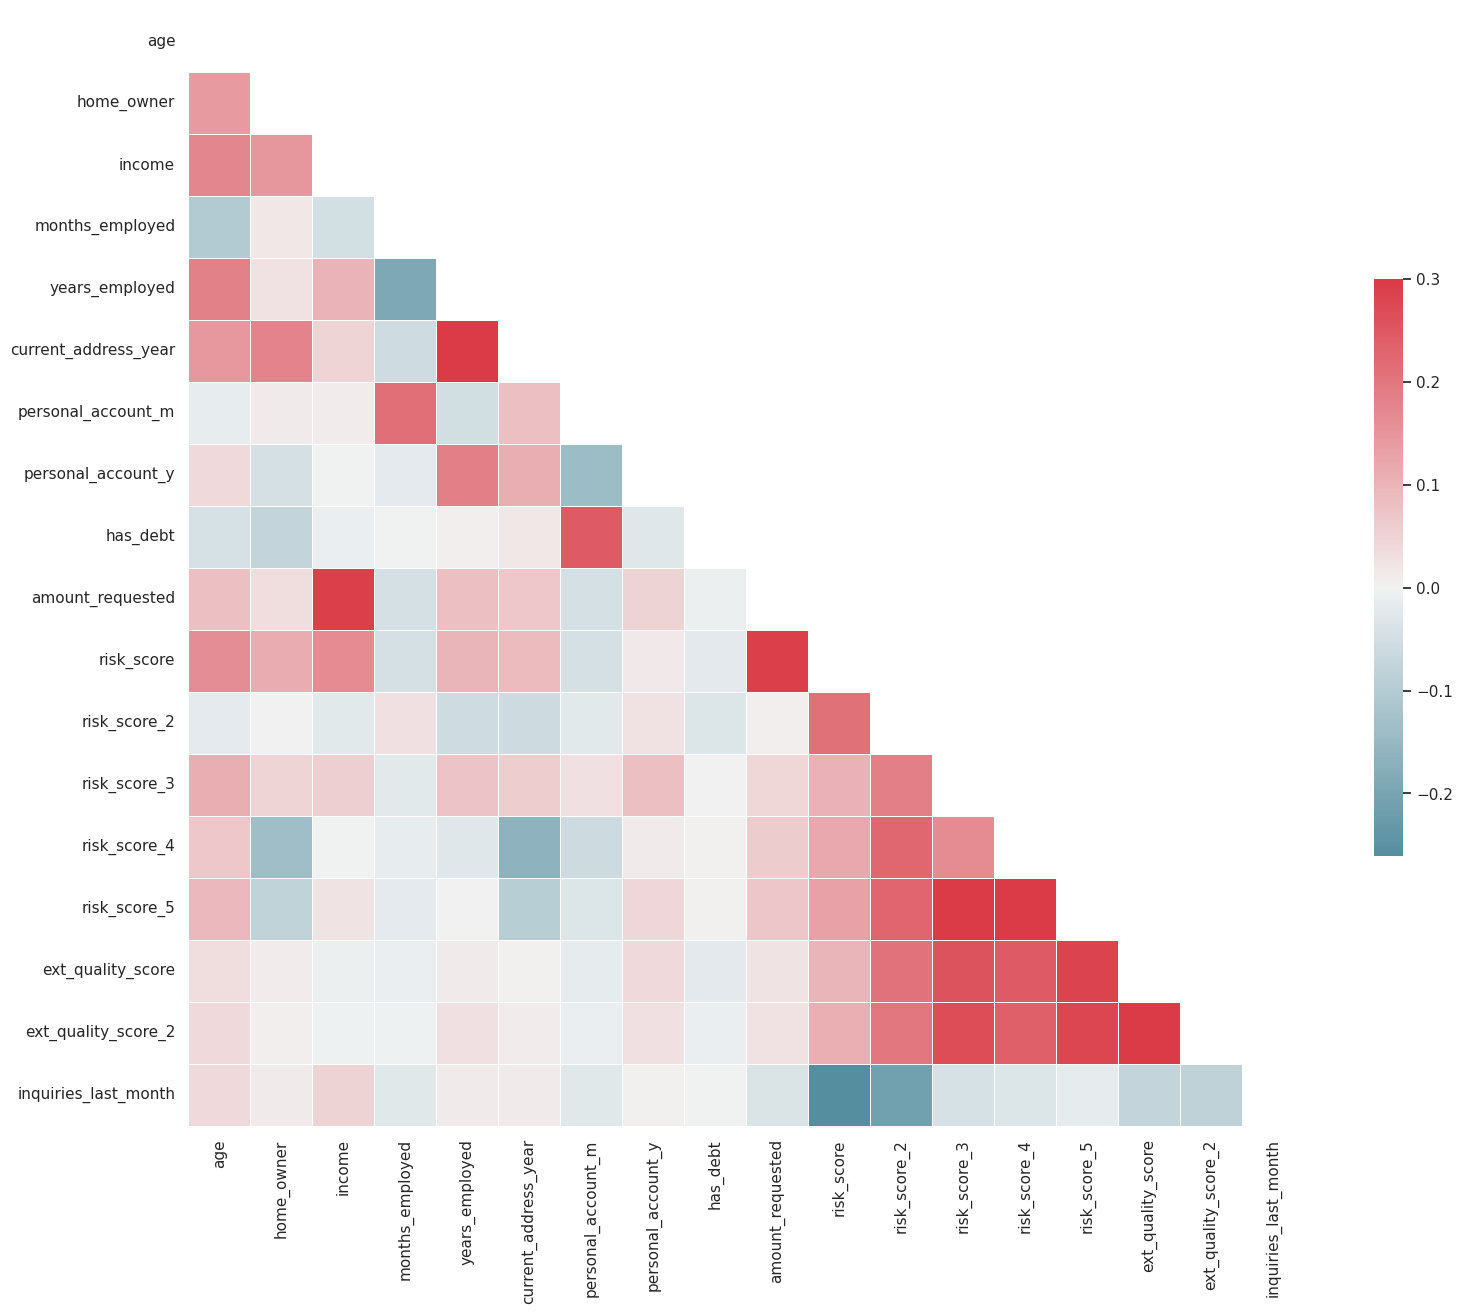

In [12]:
sns.set(style = "white")
corr = dataset2.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(18,15))
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,center=0,
           square=True,linewidths=.5,cbar_kws={"shrink":.5})

In [13]:
import random
import time

In [14]:
random.seed(100)

Feature Engineering

In [15]:
dataset = dataset.drop(columns = ['months_employed'])
dataset['personal_account_months'] = dataset.personal_account_m + (dataset.personal_account_y * 12)
dataset[['personal_account_m', 'personal_account_y', 'personal_account_months']]

,personal_account_m,personal_account_y,personal_account_months
0,6,2,30
1,2,7,86
2,7,1,19
3,2,7,86
4,2,8,98
...,...,...,...
17903,2,6,74
17904,3,3,39
17905,1,8,97
17906,6,1,18


In [16]:
dataset = dataset.drop(columns = ['personal_account_m', 'personal_account_y'])

One Hot Encoding

In [17]:
dataset = pd.get_dummies(dataset)
dataset.columns
dataset = dataset.drop(columns = ['pay_schedule_semi-monthly'])

Removing Extra Columns

In [18]:
response = dataset["e_signed"]
users = dataset["entry_id"]
dataset = dataset.drop(columns = ["e_signed", "entry_id"])

Splitting into Train and Test Set

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, response, test_size = 0.2, random_state = 0)

Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.fit_transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

Model Building

In [21]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty = 'l1', solver = 'liblinear')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Linear Regression (Lasso)', acc, prec, rec, f1]],
             columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Scroe'])

In [22]:
results

,Model,Accuracy,Precision,Recall,F1 Scroe
0,Linear Regression (Lasso),0.563372,0.577778,0.701245,0.633552


Test Other Models

In [23]:
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'linear')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1]],
             columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Scroe'])

In [24]:
model_results

,Model,Accuracy,Precision,Recall,F1 Scroe
0,SVM (Linear),0.567839,0.578189,0.728734,0.644791


In [25]:
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'rbf')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results2 = pd.DataFrame([['SVM (rbf)', acc, prec, rec, f1]],
             columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Scroe'])

In [26]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 50,
                                    criterion = 'entropy')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results3 = pd.DataFrame([['Random Forest (n=100)', acc, prec, rec, f1]],
             columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Scroe'])

In [27]:
results = pd.concat([results, model_results, model_results2, model_results3], ignore_index = True)

In [28]:
results

,Model,Accuracy,Precision,Recall,F1 Scroe
0,Linear Regression (Lasso),0.563372,0.577778,0.701245,0.633552
1,SVM (Linear),0.567839,0.578189,0.728734,0.644791
2,SVM (rbf),0.592686,0.607519,0.687241,0.644926
3,Random Forest (n=100),0.624791,0.650051,0.656120,0.653072


K-fold Cross Validation

In [29]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv=10)

print("Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)" % (accuracies.mean(), accuracies.std() * 2))

Random Forest Classifier Accuracy: 0.63 (+/- 0.02)


Parameter Tuning

In [30]:
# Round 1: Entropy
parameters = {"max_depth": [3,None],
              "max_features": [5, 10],
              "min_samples_split": [2, 10],
              "min_samples_leaf": [1, 10],
              "bootstrap": [True, False],
              "criterion": ["entropy"]}

In [32]:
from sklearn.model_selection import RandomizedSearchCV
grid_search = RandomizedSearchCV(estimator = classifier,
                           param_distributions = parameters,
                           scoring = "accuracy",
                           cv = 5,
                           n_jobs = -1
                           )

In [33]:
t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1-t0))

Took 176.91 seconds


In [34]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_

In [35]:
rf_best_accuracy

np.float64(0.6310906103818129)

In [36]:
rf_best_parameters

{'min_samples_split': 10,
 'min_samples_leaf': 10,
 'max_features': 5,
 'max_depth': None,
 'criterion': 'entropy',
 'bootstrap': False}

In [47]:
# Round 2: Entropy
parameters = {"max_depth": [None],
              "max_features": [3, 5, 7],
              "min_samples_split": [8, 10, 12],
              "min_samples_leaf": [1, 2, 3],
              "bootstrap": [True],
              "criterion": ["entropy"]}

In [48]:
grid_search = RandomizedSearchCV(estimator = classifier,
                           param_distributions = parameters,
                           scoring = "accuracy",
                           cv = 5,
                           n_jobs = -1
                           )


In [49]:
t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1-t0))

Took 156.57 seconds


In [50]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_

In [51]:
rf_best_accuracy

np.float64(0.6297638924917399)

In [52]:
rf_best_parameters

{'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_features': 5,
 'max_depth': None,
 'criterion': 'entropy',
 'bootstrap': True}

In [53]:
y_pred = grid_search.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100, GSx2 + Entropy)', acc, prec, rec, f1]],
             columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Scroe'])

In [63]:
results = pd.concat([results, model_results], ignore_index=True)

In [64]:
results

,Model,Accuracy,Precision,Recall,F1 Scroe
0,SVM (Linear),0.567839,0.578189,0.728734,0.644791
1,SVM (rbf),0.592686,0.607519,0.687241,0.644926
2,Random Forest (n=100),0.624791,0.650051,0.656120,0.653072
3,"Random Forest (n=100, GSx2 + Entropy)",0.625628,0.642407,0.686722,0.663826


In [65]:
# Round 1: Gini
parameters = {"max_depth": [3,None],
              "max_features": [5, 10],
              "min_samples_split": [2, 10],
              "min_samples_leaf": [1, 10],
              "bootstrap": [True, False],
              "criterion": ["gini"]}

grid_search = RandomizedSearchCV(estimator = classifier,
                           param_distributions = parameters,
                           scoring = "accuracy",
                           cv = 5,
                           n_jobs = -1
                           )

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1-t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_

Took 132.70 seconds


In [67]:
rf_best_parameters

{'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 10,
 'max_depth': None,
 'criterion': 'gini',
 'bootstrap': False}

In [68]:
# Round 2: Entropy
parameters = {"max_depth": [None],
              "max_features": [8, 10, 12],
              "min_samples_split": [10],
              "min_samples_leaf": [1],
              "bootstrap": [True, False],
              "criterion": ["gini"]}

grid_search = RandomizedSearchCV(estimator = classifier,
                           param_distributions = parameters,
                           scoring = "accuracy",
                           cv = 5,
                           n_jobs = -1
                           )

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1-t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Took 179.32 seconds


In [70]:
rf_best_parameters

{'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 8,
 'max_depth': None,
 'criterion': 'gini',
 'bootstrap': True}

In [71]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100, GSx2 + Gini)', acc, prec, rec, f1]],
             columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Scroe'])

results = pd.concat([results, model_results], ignore_index=True)

In [72]:
results

,Model,Accuracy,Precision,Recall,F1 Scroe
0,SVM (Linear),0.567839,0.578189,0.728734,0.644791
1,SVM (rbf),0.592686,0.607519,0.687241,0.644926
2,Random Forest (n=100),0.624791,0.650051,0.656120,0.653072
3,"Random Forest (n=100, GSx2 + Entropy)",0.625628,0.642407,0.686722,0.663826
4,"Random Forest (n=100, GSx2 + Gini)",0.624791,0.650051,0.656120,0.653072


Formatting Final Results

In [73]:
final_results = pd.concat([y_test, users], axis = 1).dropna()

In [74]:
final_results['predictions'] = y_pred

In [75]:
final_results = final_results[['entry_id', 'e_signed', 'predictions']]

In [76]:
final_results

,entry_id,e_signed,predictions
3629,8825262,1.0,0
1820,9216889,1.0,1
6685,1762129,0.0,0
17241,7249770,1.0,1
8332,5967375,1.0,1
...,...,...,...
7546,9384491,1.0,0
9836,2445124,1.0,0
7446,6534419,1.0,1
9526,5501730,1.0,1
